In [50]:
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import xarray as xr
import glob
import om4labs.om4common as om4
from scipy.stats import t
import os

# parameters for setting circular cutoff for Southern Ocean plots
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

In [2]:
fpath_in = {'ESM4': '/work/Katherine.Turner/smaller_projects/hifreq-variability/data/ESM4',
         'CM4':'/archive/Katherine.Turner/xanadu_mom6_20220703/CM4_piControl_C_restartyear148/gfdl.ncrc5-intel22-prod-openmp/pp/atmos_cmip_2deg_daily_3D_Plev8/ts/daily/5yr'}

fpath_out = {'ESM4': '/work/Katherine.Turner/smaller_projects/hifreq-variability/data/ESM4',
         'CM4':'/work/Katherine.Turner/smaller_projects/hifreq-variability/data/CM4'}

In [3]:
m = 'CM4'
#ds = xr.open_mfdataset(f"{fpath[m]}/*.zg.nc", use_cftime=True)

In [21]:
for filename in os.listdir(fpath_in[m])[15:]:
    if filename.endswith('.zg.nc'):
        ds = xr.open_dataset(f"{fpath_in[m]}/{filename}", use_cftime=True)
        da = ds.zg.sel(plev19=500*1e2, method='nearest').resample(time='A').mean().drop_vars('plev19')
        
        ds_out = da.to_dataset(name='Z500')
        ds_out.to_netcdf(f"{fpath_out[m]}/{filename[:-4]}500.nc")
        print(filename)

atmos_cmip_2deg_daily_3D_Plev8.01860101-01901231.zg.nc
atmos_cmip_2deg_daily_3D_Plev8.01960101-02001231.zg.nc
atmos_cmip_2deg_daily_3D_Plev8.01910101-01951231.zg.nc
atmos_cmip_2deg_daily_3D_Plev8.02010101-02051231.zg.nc
atmos_cmip_2deg_daily_3D_Plev8.02060101-02101231.zg.nc
atmos_cmip_2deg_daily_3D_Plev8.02110101-02151231.zg.nc
atmos_cmip_2deg_daily_3D_Plev8.02160101-02201231.zg.nc
atmos_cmip_2deg_daily_3D_Plev8.01710101-01751231.zg.nc
atmos_cmip_2deg_daily_3D_Plev8.01660101-01701231.zg.nc
atmos_cmip_2deg_daily_3D_Plev8.01610101-01651231.zg.nc
atmos_cmip_2deg_daily_3D_Plev8.01810101-01851231.zg.nc
atmos_cmip_2deg_daily_3D_Plev8.01760101-01801231.zg.nc
atmos_cmip_2deg_daily_3D_Plev8.02260101-02301231.zg.nc
atmos_cmip_2deg_daily_3D_Plev8.02210101-02251231.zg.nc
atmos_cmip_2deg_daily_3D_Plev8.02310101-02351231.zg.nc
atmos_cmip_2deg_daily_3D_Plev8.02410101-02451231.zg.nc
atmos_cmip_2deg_daily_3D_Plev8.02360101-02401231.zg.nc


In [22]:
ds = xr.open_mfdataset(f"{fpath_out[m]}/atmos_cmip_2deg_daily_3D_Plev8.*z500.nc", use_cftime=True)

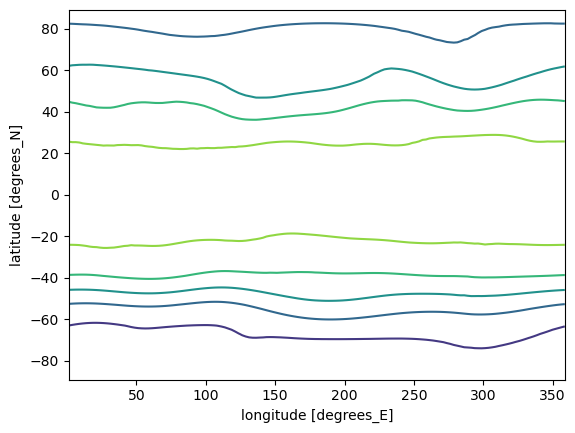

In [43]:
ds.Z500.mean(dim='time').plot.contour()

In [29]:
## including a CMIP ESM4 run as the postprocessing for me is being very funny

In [39]:
ds_esm = xr.open_mfdataset(
    '/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_plev39_cmip/ts/monthly/5yr/atmos_plev39_cmip.00*.zg.nc',
    use_cftime=True)

(-90.0, 0.0)

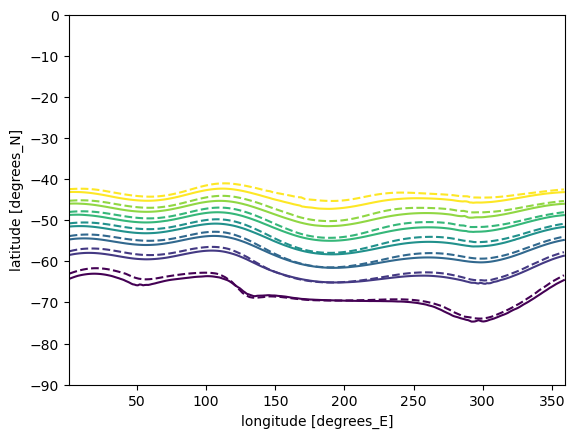

In [49]:
ds_esm.zg.sel(plev39=500*1e2, method='nearest').mean(dim='time').plot.contour(vmin=5000, vmax=5500, levels=7)
ds.Z500.mean(dim='time').plot.contour(linestyles='--',vmin=5000, vmax=5500, levels=7)

plt.ylim([-90,0])

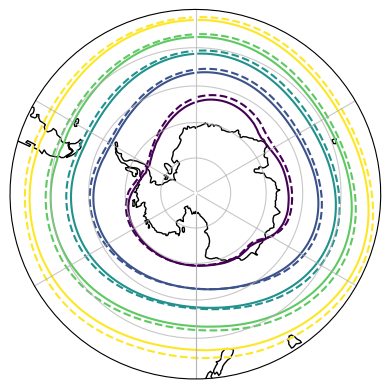

In [52]:
fig, axs = plt.subplots(subplot_kw={'projection': ccrs.SouthPolarStereo()}, 
                       )

ds_esm.zg.sel(plev39=500*1e2, method='nearest').mean(dim='time').plot.contour(transform=ccrs.PlateCarree(),
                                                                              vmin=5000, vmax=5500, levels=5)
ds.Z500.mean(dim='time').plot.contour(transform=ccrs.PlateCarree(),
                                      linestyles='--',vmin=5000, vmax=5500, levels=5)


axs.set_extent([-180, 180, -90, -40], ccrs.PlateCarree())
axs.gridlines(alpha=0.7)
axs.set_boundary(circle, transform=axs.transAxes)
axs.coastlines()